In [6]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\artem\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [11]:
files={'SARIMAX':'all_data_SAR_10_neighb.pkl',
       'Prophet':'all_data_PRF_10_neighb.pkl',
       'XGboost':'all_data_XGB_10_neighb.pkl'}
nodes_number = 3600

SARIMAX
   > RMSE_1 mean:	 188.25 	RMSE_2 mean:	 194.95
   > RMSE_1 median:	 124.19 	RMSE_2 median:	 128.46
   > MAPE_1 mean:	 1.422 		MAPE_2 mean:	 1.467
   > RMSE change [%]:	 4.77
   > Probability of increased accuracy:	 0.47
Prophet
   > RMSE_1 mean:	 173.48 	RMSE_2 mean:	 167.85
   > RMSE_1 median:	 117.37 	RMSE_2 median:	 114.22
   > MAPE_1 mean:	 1.394 		MAPE_2 mean:	 1.44
   > RMSE change [%]:	 -3.84
   > Probability of increased accuracy:	 0.61
XGboost
   > RMSE_1 mean:	 174.56 	RMSE_2 mean:	 174.49
   > RMSE_1 median:	 123.39 	RMSE_2 median:	 122.91
   > MAPE_1 mean:	 1.445 		MAPE_2 mean:	 1.429
   > RMSE change [%]:	 0.6
   > Probability of increased accuracy:	 0.49


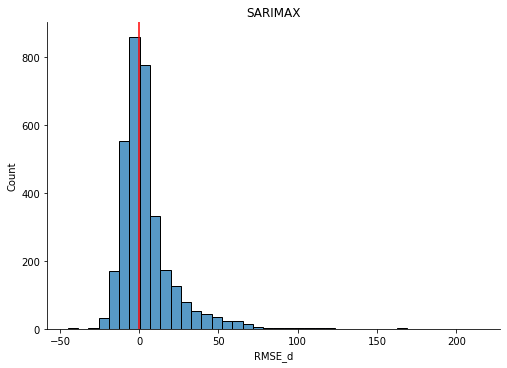

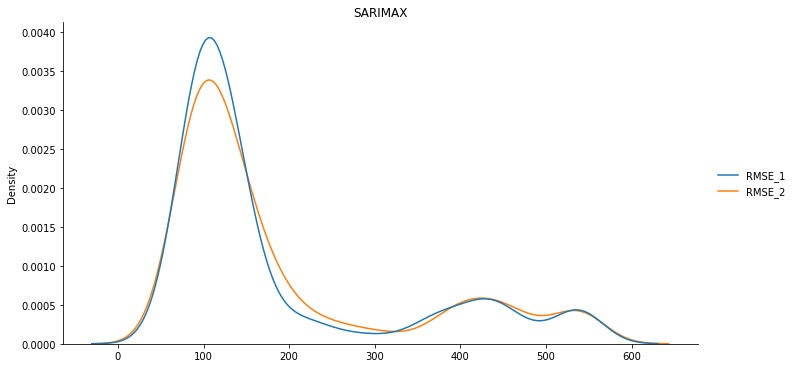

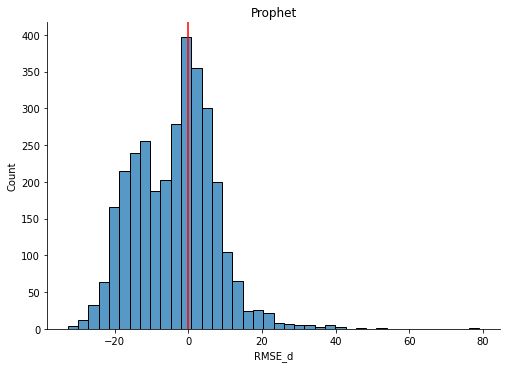

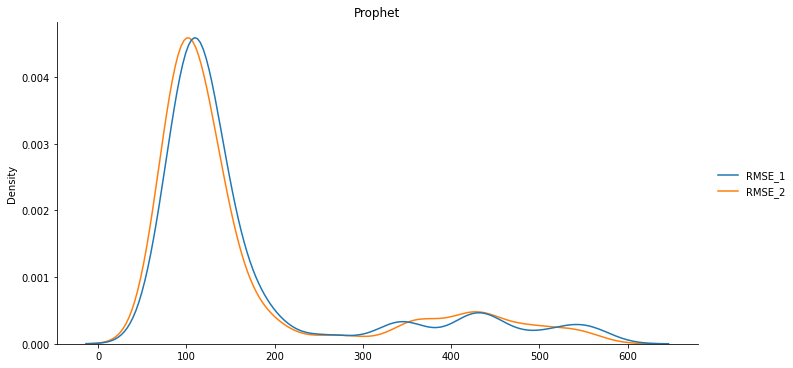

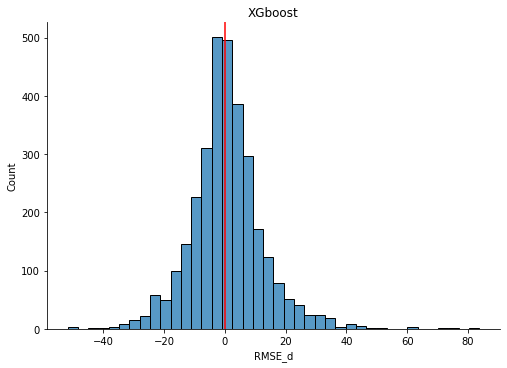

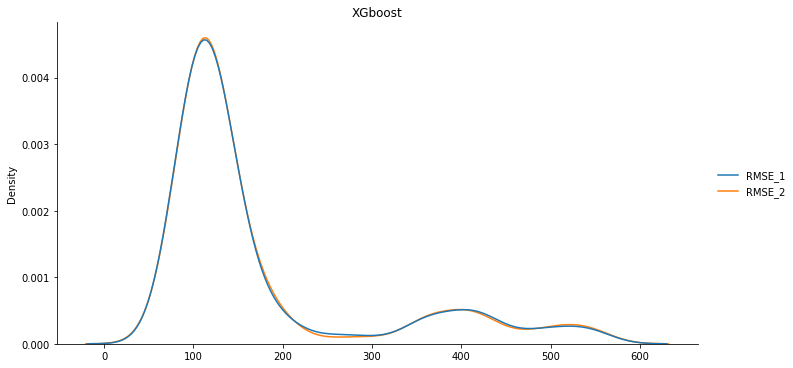

In [78]:
for model in files.keys():
    print(model)
    with open(files[model], 'rb') as f:
        df = pd.DataFrame.from_dict(pickle.load(f))
    df = df[:3600] 
    df = df[(np.abs(stats.zscore(df)) < 2).all(axis=1)]
    # adding efficiency after neighbors including
    df['RMSE_d']=round((df['RMSE_2']-df['RMSE_1'])/df['RMSE_1']*100,2)
    p = round(len(df[df['RMSE_d']<0]) / len(df),2)
    print("   > RMSE_1 mean:\t", round(df['RMSE_1'].mean(), 2), "\tRMSE_2 mean:\t", round(df['RMSE_2'].mean(), 2))
    print("   > RMSE_1 median:\t", round(df['RMSE_1'].median(), 2), "\tRMSE_2 median:\t", round(df['RMSE_2'].median(), 2))
    print("   > MAPE_1 mean:\t", round(df['MAPE_1'].mean(), 3), "\t\tMAPE_2 mean:\t", round(df['MAPE_2'].mean(), 3))
    print("   > RMSE change [%]:\t",round(df['RMSE_d'].mean(), 2))
    print("   > Probability of increased accuracy:\t", p)
    sns.displot(df['RMSE_d'], bins=40, aspect=10/7).set(title=model)
    plt.axvline(0.0, color='red')
    sns.displot(df[['RMSE_1', 'RMSE_2']], kind='kde',aspect=2).set(title=model)